# Time Series Forecasting Assignment 
For Part 1, Choose _either_ Option A or Option B <br>
For Part 2, Find a time series (either univariate, or multivariate) and apply the time series methods from Part 1 to analyze it. 


## Part 1, Option A: Software Engineering (1.5 to 2 hours max)
Write a `ForecastingToolkit` class 
that packages up the workflow of time series forecasting, that we learned from today's Lecture Notebook. Add any desired "bells and whistles" to make it even better!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries
from tensorflow.keras import regularizers

class ForecastingToolkit(object):
    def __init__(self, df = None, model = None):
        """
        Variables that we passed into our functions should now be defined 
        as class attributes, i.e. class variables. 
        """
        # here are a few to get you started 
        
        # store data here
        self.df = df
        
        # store your forecasting model here
        self.model = model
        
        # store feature scalers here
        self.scaler_dict = None
        
        # store the training results of your model here
        self.history = None
    
    def load_transform_data(self):
        pass
    
    def scale_data(self):
        pass
    
    def invert_scaling(self):
        pass
    
    def create_dataset(self):
        pass
    
    def create_train_test_split(self):
        pass
    
    def build_model(self):
        pass
    
    def fit_model(self):
        pass
    
    def predict(self):
        pass
    
    def plot_model_loss_metrics(self):
        pass
    

----

In [2]:
# once you've completed your class, you'll be able to perform a many operations with just a few lines of code!
tstk = ForecastingToolkit()
tstk.load_transform_data()
tstk.scale_data()
tstk.build_model()
tstk.fit_model()
tstk.plot_model_loss_metrics()

## Part 1, Option B: A Deeper Dive in Time-Series Forecasting (1.5 to 2 hours max)

Work through this notebook [time_series_forecasting](https://drive.google.com/file/d/1RgyaO9zuZ90vWEzQWo1iVip1Me7oiHiO/view?usp=sharing), which compares a number of forecasting methods and in the end finds that 1 Dimensional Convolutional Neural Networks is even better than LSTMs!

## Part 2 Time series forecasting on a real data set (2 hours max)
Use one or more series forecasting methods (from either Part 1A or Part 1B) to make forecasts on a real time series data set.<br> If time permits, perform hyperparameter tuning to make the forecasts as good as possible. <br>Report the MAE (mean absolute error) of your forecast, and compare to a naive baseline model. <br>Are you getting good forecasts? Why or why not? 

### Data Sets: choose from 2.1, 2.2, 2.3, or 2.4

2.1 [Daily Sunspot data](https://wwwbis.sidc.be/silso/datafiles): your task is to predict future daily sunspot numbers from the past<br>
* Use the "Total sunspot number" CSV or TXT files (grey buttons)
* Be sure to read INFO file (green button)
* You'll have to come up with a strategy for dealing with missing data
* [Data Credits: "Source: WDC-SILSO, Royal Observatory of Belgium, Brussels".]

2.2 Light Curves for target stars from NASA's Kepler Mission

* [Get the light curve files](https://www.nasa.gov/kepler/education/getlightcurves)<br>
* The data is stored in .FITS files (a format commonly used for astrophysical data). <br> 
* You need to translate from .FITS format to .CSV -- search the web for code to do this.


2.3 Here are another half-dozen or so datasets you could choose from: [7 Time Series Datasets for Machine Learning](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/)<br>

2.4 OR: Freely available time series data is plentiful on the WWW. You can choose any time series data set of interest!

YOUR ANSWERS HERE

In [3]:
sunspots_df = pd.read_csv(
    "SN_d_tot_V2.0.csv",
    names=[
        "Year",
        "Month",
        "Day",
        "Date",
        "Sunspots",
        "std",
        "num_of_obs",
        " indicator",
    ],
    na_values= {'Sunspots': -1, 'std': -1.0},
    delimiter=";",
)


In [4]:
sunspots_df.dropna(inplace=True)

In [5]:
sunspots_df = sunspots_df.drop(columns=['Date'])

In [6]:
y = sunspots_df['Sunspots']

<AxesSubplot:>

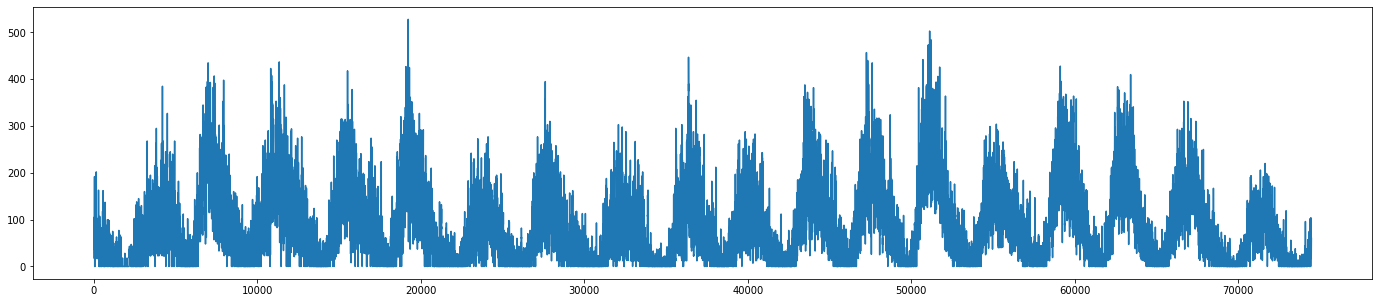

In [7]:
sunspots_df['Sunspots'].plot(figsize=(24,5))

In [8]:
sunspots_df['Date'] = sunspots_df['Year'].astype(str) + "/" + sunspots_df['Month'].astype(str) + "/" + sunspots_df['Day'].astype(str)

In [9]:
sunspots_df['Date']

7          1818/1/8
12        1818/1/13
16        1818/1/17
17        1818/1/18
18        1818/1/19
            ...    
74474    2021/11/26
74475    2021/11/27
74476    2021/11/28
74477    2021/11/29
74478    2021/11/30
Name: Date, Length: 71232, dtype: object

In [10]:
sunspots_df.index = pd.to_datetime(sunspots_df['Date'])
sunspots_df.drop(columns=['Year', 'Month', 'Day', 'Date'], inplace=True)

In [11]:
sunspots_df

,Sunspots,std,num_of_obs,indicator
Date,,,,
1818-01-08,65,10.2,1,1
1818-01-13,37,7.7,1,1
1818-01-17,77,11.1,1,1
1818-01-18,98,12.6,1,1
1818-01-19,105,13.0,1,1
...,...,...,...,...
2021-11-26,46,17.1,13,0
2021-11-27,42,7.2,29,0
2021-11-28,47,7.3,19,0


<AxesSubplot:>

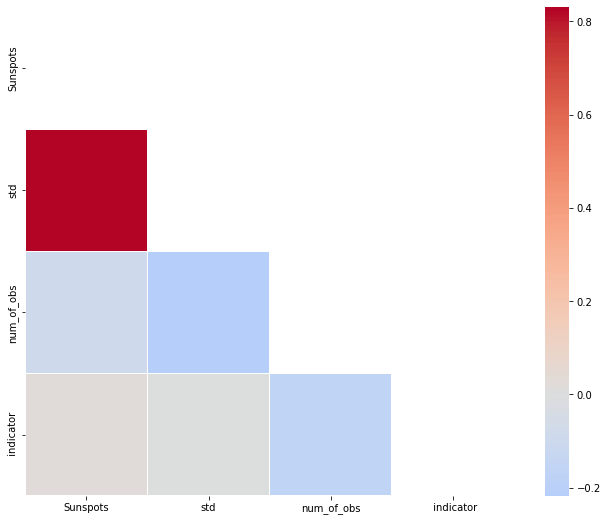

In [12]:
corr = sunspots_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, linewidths=.5, square=True)

In [13]:
sunspots_df

,Sunspots,std,num_of_obs,indicator
Date,,,,
1818-01-08,65,10.2,1,1
1818-01-13,37,7.7,1,1
1818-01-17,77,11.1,1,1
1818-01-18,98,12.6,1,1
1818-01-19,105,13.0,1,1
...,...,...,...,...
2021-11-26,46,17.1,13,0
2021-11-27,42,7.2,29,0
2021-11-28,47,7.3,19,0


In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import optimizers
from keras.callbacks import History 
from tensorflow.keras.callbacks import LearningRateScheduler

In [30]:
generator = TimeseriesGenerator(sunspots_df.drop(columns=['Sunspots']), sunspots_df['Sunspots'], length=28, batch_size=64)


In [31]:

epochs = 25
batch_size = 32
dropout_prob = 0.5

input_shape = (28, len(sunspots_df.columns))

opt = optimizers.Nadam(learning_rate=0.0032)

model = Sequential()

model.add(LSTM(256, input_shape=input_shape, activation='tanh', return_sequences=False))

model.add(Dropout(dropout_prob))

model.add(Dense(7, activation='relu'))

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])


In [32]:
lr_schedule = LearningRateScheduler(
     lambda epoch: 1e-4* 10**(epoch/10))
schedule_results = model.fit(generator, 
                    epochs=40, 
                    batch_size=batch_size, 
                    verbose=1,
                    callbacks = [lr_schedule])

Epoch 1/40
1113/1113 [==============================] - 8s 6ms/step - loss: 10346.1484 - mean_absolute_error: 72.0254 - lr: 1.0000e-04
Epoch 2/40
1113/1113 [==============================] - 7s 6ms/step - loss: 7867.2749 - mean_absolute_error: 60.1848 - lr: 1.2589e-04
Epoch 3/40
1113/1113 [==============================] - 7s 6ms/step - loss: 5895.2246 - mean_absolute_error: 50.3280 - lr: 1.5849e-04
Epoch 4/40
1113/1113 [==============================] - 7s 6ms/step - loss: 4389.6475 - mean_absolute_error: 42.5643 - lr: 1.9953e-04
Epoch 5/40
1113/1113 [==============================] - 7s 7ms/step - loss: 3366.6921 - mean_absolute_error: 37.1783 - lr: 2.5119e-04
Epoch 6/40
1113/1113 [==============================] - 7s 7ms/step - loss: 2698.7102 - mean_absolute_error: 33.5144 - lr: 3.1623e-04
Epoch 7/40
1113/1113 [==============================] - 7s 7ms/step - loss: 2329.7507 - mean_absolute_error: 31.5591 - lr: 3.9811e-04
Epoch 8/40
1113/1113 [==============================] - 7s 7m

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1.e-6)
history = model.fit(generator, 
                    epochs=100, 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks = [early_stopping])

Epoch 1/100
1113/1113 [==============================] - 9s 8ms/step - loss: 5119.4883 - mean_absolute_error: 53.6623
Epoch 2/100
1113/1113 [==============================] - 8s 7ms/step - loss: 5137.1704 - mean_absolute_error: 54.3783
Epoch 3/100
1113/1113 [==============================] - 8s 7ms/step - loss: 4788.5513 - mean_absolute_error: 51.9500
Epoch 4/100
1113/1113 [==============================] - 8s 8ms/step - loss: 4196.1182 - mean_absolute_error: 47.2884
Epoch 5/100
1113/1113 [==============================] - 8s 7ms/step - loss: 4180.9644 - mean_absolute_error: 47.4509
Epoch 6/100
1113/1113 [==============================] - 8s 7ms/step - loss: 4894.9849 - mean_absolute_error: 51.7652
Epoch 7/100
1113/1113 [==============================] - 8s 7ms/step - loss: 4648.8872 - mean_absolute_error: 50.8031
Epoch 8/100
1113/1113 [==============================] - 8s 7ms/step - loss: 5570.8237 - mean_absolute_error: 57.0002
Epoch 9/100
1113/1113 [==============================] -

In [ ]:
# Not Done need to scale data and also add in predictions 